In [45]:
from bs4 import BeautifulSoup as Soup
import xml.etree.ElementTree
import re, nltk
import urllib.request as urllib
def clean(text):
    soup = Soup('\n'.join(re.findall(r"<TYPE>10-K.*?</DOCUMENT>", text, re.S)))
    text = soup.get_text().lower()
    return re.sub('[^A-Za-z]*[^A-Za-z]', ' ', text)

#Clean the data report from year 2010 to 2018
for x in range(2010,2019):
    yearCount = x
    year = "APPLE INC" + "_" + str(x) + ".txt"
    cleanedFormat = "APPLE INC" + "_" + str(x) + "_" + "cleaned" + ".txt"
    with open(year , 'r') as f:
        t = f.read()
        cleaned = clean(t)
    with open(cleanedFormat, 'w') as f:
        f.write(cleaned)

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [21]:
with open("APPLE INC_2014_cleaned.txt", 'r') as f:
    content = f.read()
    print(content)

 k d d k htm k k table of contents united states securities and exchange commission washington d c form k mark one x annual report pursuant to section or d of the securities exchange act of for the fiscal year ended september or transition report pursuant to section or d of the securities exchange act of for the transition period from to commission file number apple inc exact name of registrant as specified in its charter california state or other jurisdiction of incorporation or organization i r s employer identification no infinite loop cupertino california address of principal executive offices zip code registrant s telephone number including area code securities registered pursuant to section b of the act common stock par value per share the nasdaq stock market llc title of class name of exchange on which registered securities registered pursuant to section g of the act none indicate by check mark if the registrant is a well known seasoned issuer as defined in rule of the securitie

How many most common words to print: 50

OK. The 50 most common words are as follows

company :  541
company’s :  466
2018 :  342
financial :  204
net :  202
2017 :  188
september :  185
may :  179
products :  176
sales :  168
tax :  167
notes :  154
| :  144
due :  138
form :  132
services :  129
billion :  129
could :  123
foreign :  123
10-k :  114
operating :  106
us :  105
related :  99
stock :  98
29 :  96
including :  96
product :  95
cash :  95
apple :  89
statements :  89
certain :  88
inc :  88
income :  87
2016 :  87
information :  83
software :  83
value :  82
— :  81
new :  80
also :  79
assets :  76
revenue :  72
future :  71
consolidated :  70
exchange :  67
securities :  64
based :  64
accounting :  63
rate :  62
change :  61


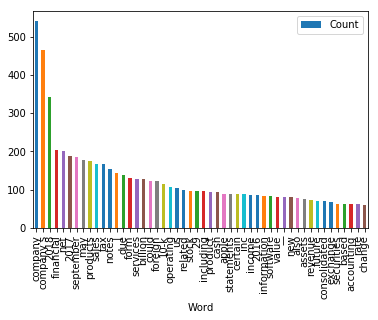

In [12]:
import collections
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
%matplotlib inline
# Read input file, note the encoding is specified here 
# It may be different in your text file
file = open('apple_txt.txt', encoding="utf8")
a= file.read()
# Stopwords
stopwords = set(line.strip() for line in stop_words)
# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)
# Close the file
file.close()
# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

In [35]:
#load the data
filename = "apple_txt.txt"
file = open(filename, 'rt')
text = file.read()
file.close()
#split into words
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text)
#convert to lower case
tokens = [w.lower() for w in tokens]
# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]
# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]
# filter out stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words[:100])

['document', 'united', 'statessecurities', 'exchange', 'commissionwashington', 'dc', 'form', 'mark', 'one', 'annual', 'report', 'pursuant', 'section', 'securities', 'exchange', 'act', 'fiscal', 'year', 'ended', 'september', 'transition', 'report', 'pursuant', 'section', 'securities', 'exchange', 'act', 'transition', 'period', 'commission', 'file', 'number', 'apple', 'inc', 'exact', 'name', 'registrant', 'specified', 'charter', 'california', 'state', 'jurisdictionof', 'incorporation', 'organization', 'irs', 'employer', 'identification', 'one', 'apple', 'park', 'waycupertino', 'california', 'address', 'principal', 'executive', 'offices', 'zip', 'code', 'registrant', 'telephone', 'number', 'including', 'area', 'code', 'securities', 'registered', 'pursuant', 'section', 'b', 'act', 'common', 'stock', 'par', 'value', 'per', 'notes', 'due', 'notes', 'due', 'notes', 'due', 'notes', 'due', 'notes', 'due', 'notes', 'due', 'notes', 'due', 'notes', 'due', 'nasdaq', 'stock', 'market', 'llcnew', 'yo

In [16]:
#The function computeTF computes the TF score for each word in the corpus
#by document. Formula: number of the word / total number of words in the document.
def computeTF(wordDict, bow):
    tfDict = {}
    bowCount = len(bow)
    for word, count in wordDict.items():
        tfDict[word] = count/float(bowCount)
    print(tfDict)

In [17]:
#The function computeIDF computes the IDF score for each word in the corpus.
#Formula : log(N/dft) => total number of document / number of documents containing t
def computeIDF(docList):
    import math
    idfDict = {}
    N = len(docList)
    
    idfDict = dict.fromkeys(docList[0].keys(),0)
    for doc in docList:
        for word, val in doc.items():
            if val > 0:
                idfDict[word]+=1
    for word, val in idfDict.items():
        idfDict[word] = math.log10(N/float(val))
        
    return idfDict

In [18]:
#The function computeTFIDF computes the TF-IDF score for each word
#by multiplying the TF and IDF scores
def computeTFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val * idfs[word]
    return tfidf

In [19]:
S1 = "The car is driven on the road"
S2= "The truck is driven on the highway"

In [20]:
from sklearn.feature_extraction.text import TfidVectorizer
vectorizer = TFidVectorizer()
response = vectorizer.fit_transform([S1, S2])
print(response)

ImportError: cannot import name 'TfidVectorizer'

In [21]:
Dict = {'The': 2, 'car':1, 'is':2, 'truck': 1, 'driven': 2, 'on': 2, 'the': 2, 'road':1, 'highway': 1}

In [22]:
computeTF(Dict, 14)

TypeError: object of type 'int' has no len()